#Import Libraries

Hello, firstly its Machine learning is very easy just understand the concepts dont, simply try to memorize everything.

Here we have imported three libraries Numpy, Pandas & Matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


We have loaded the dataset and reading the csv file using pandas pd() Function.

In [4]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head() #Simply used to get top 5 Rows of dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace=True)  #Dropping unused column in same dataset
print(df)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [8]:
df.shape   #It defines the shape of dataset like in Here We have 100 Rows and 3 Columns

(100, 3)

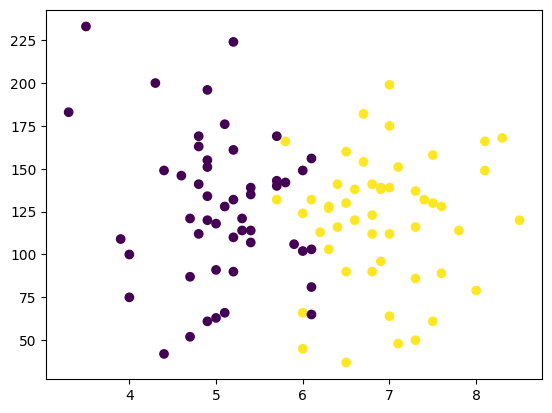

In [11]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])   #Created a scatter plot to visualize the data


In [12]:
X = df.iloc[:,0:2]  #Created test data
y = df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.3, random_state=42)    #splitting data into train and test method

In [33]:
X_train

,cgpa,iq
11,6.9,138.0
47,5.2,161.0
85,5.8,166.0
28,5.2,90.0
93,6.8,112.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [16]:
from sklearn.preprocessing import StandardScaler


In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)   #scaling the data of X_train as, They help improve model performance, enhance convergence and reduce biases.
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [41]:
clf.fit(X_train, y_train) #Training the model

LogisticRegression()

In [38]:
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)  #Evaluation of model like here we have checked the accuracy score of the model is 100% it might be due to overfitting, its okay as its our first Learning and Training of ML Models so.

0.9

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Train Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.92      0.94      0.93        35

    accuracy                           0.93        70
   macro avg       0.93      0.93      0.93        70
weighted avg       0.93      0.93      0.93        70

Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [26]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

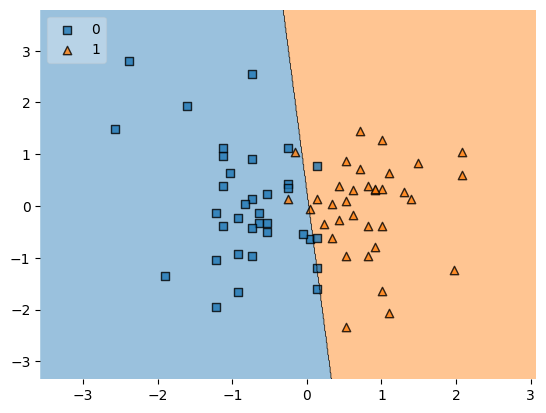

In [43]:
plot_decision_regions(X_train, y_train.values , clf=clf, legend=2)

In [44]:
import pickle

In [46]:
pickle.dump(clf, open('model.pkl', 'wb'))   #creating a model file which can used to deploy and use for real world input